In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from network import solve_ode_network, signal_processing_on_hopf, smoothening_envelope, compute_envelope_fc
from utility import plot_x_values
from scipy.stats import pearsonr
from scipy.signal import hilbert, butter, filtfilt
from scipy.signal import hilbert, hilbert2, savgol_filter, find_peaks
from scipy.interpolate import interp1d

In [2]:
mat = loadmat('../references/AAL78/C78.mat')
C = mat['C']
alpha = 0.2
C = alpha * C / np.max(C)

Solving ODE Network...
Processing signal for frequency 12Hz...


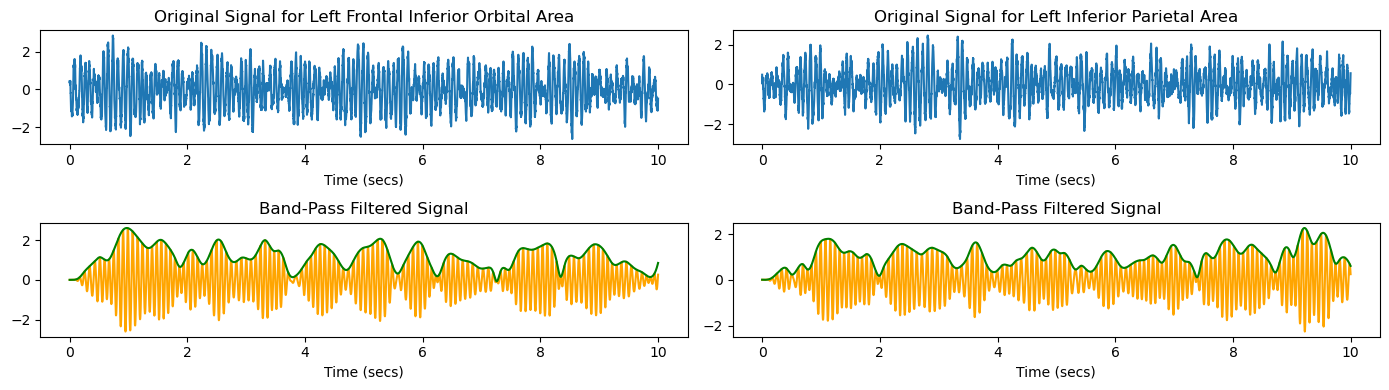

In [3]:
f=12
G=0.5
num_steps = 10000  # total steps
dt = 0.001  # time step
a = 0  # intrinsic dynamics parameters for each neuron
omega = 2 * np.pi * f  # angular frequencies for each neuron
beta = 3 # noise level

x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)

signal = x_values # r_values

x_signal, filtered_x, _, _, smoothened_env_x, _ =  signal_processing_on_hopf(signal, C, dt, f=12, G=0.5)

plot_x_values(x_signal, filtered_x, smoothened_env_x, dt, num_steps)

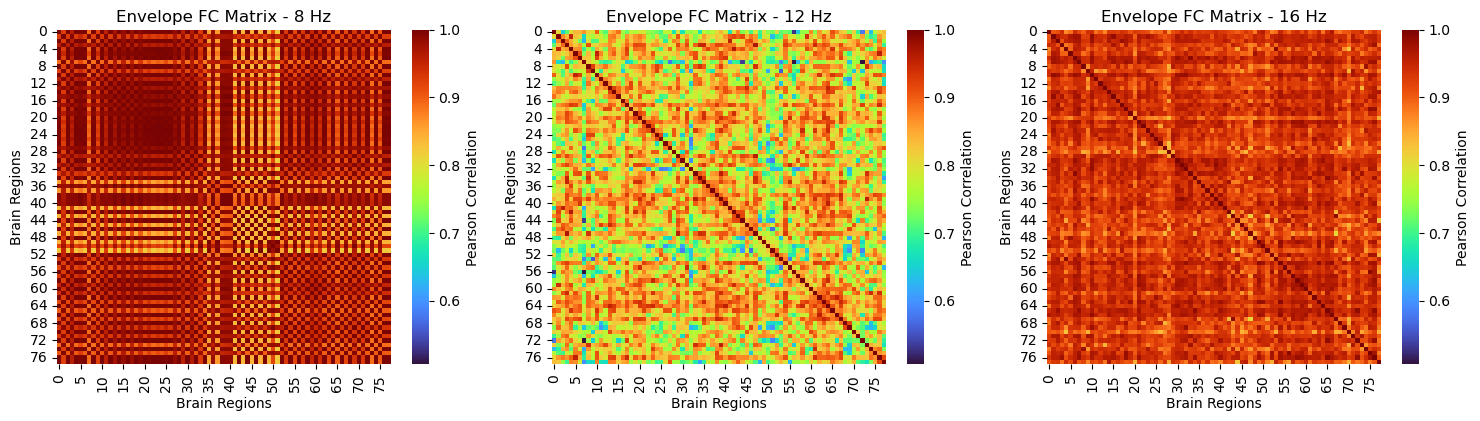

In [19]:
G = 0.5
num_steps = 32000  # total steps
dt = 0.001  # time step
a = 0.0  # intrinsic dynamics parameters for each neuron

beta = 3 # noise level

frequencies = range(8, 17, 4)

# Set up the plot grid
num_frequencies = len(frequencies)
cols = 3  # Define number of columns for subplots
rows = num_frequencies // cols + (num_frequencies % cols > 0)  # Calculate required number of rows

plt.figure(figsize=(cols * 5, rows * 4))  # Adjust the size as needed

# Determine the global min and max correlation values for consistent colormap scaling
min_corr = np.inf
max_corr = -np.inf
for f in frequencies:
    omega = 2 * np.pi * f  # angular frequencies for each neuron
    x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)
    _, _, _, _, _, ultra_slow_x = signal_processing_on_hopf(x_values, C, dt, f, G)
    envelope_fc = compute_envelope_fc(ultra_slow_x)
    min_corr = min(min_corr, envelope_fc.min())
    max_corr = max(max_corr, envelope_fc.max())

# Plot each Envelope FC matrix as a heatmap
for i, f in enumerate(frequencies):
    omega = 2 * np.pi * f  # angular frequencies for each neuron
    x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)
    _, _, _, _, _, ultra_slow_x = signal_processing_on_hopf(x_values, C, dt, f, G)
    envelope_fc = compute_envelope_fc(ultra_slow_x)

    # Plotting the Envelope FC matrix as a heatmap
    plt.subplot(rows, cols, i + 1)
    sns.heatmap(envelope_fc, cmap='turbo', square=True, cbar_kws={'label': 'Pearson Correlation'}, vmin=min_corr, vmax=max_corr)
    plt.title(f'Envelope FC Matrix - {f} Hz')
    plt.xlabel('Brain Regions')
    plt.ylabel('Brain Regions')

plt.tight_layout()
plt.show()

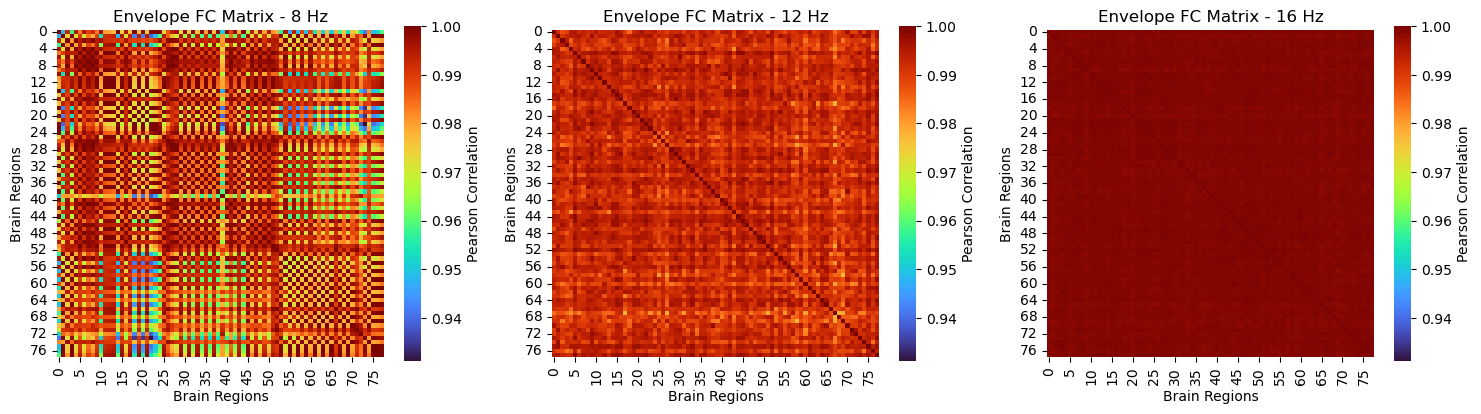

In [17]:
G = 0.5
num_steps = 32000  # total steps
dt = 0.001  # time step
a = 0.0  # intrinsic dynamics parameters for each neuron

beta = 0.5 # noise level

frequencies = range(8, 17, 4)

# Set up the plot grid
num_frequencies = len(frequencies)
cols = 3  # Define number of columns for subplots
rows = num_frequencies // cols + (num_frequencies % cols > 0)  # Calculate required number of rows

plt.figure(figsize=(cols * 5, rows * 4))  # Adjust the size as needed

# Determine the global min and max correlation values for consistent colormap scaling
min_corr = np.inf
max_corr = -np.inf
for f in frequencies:
    omega = 2 * np.pi * f  # angular frequencies for each neuron
    x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)
    _, _, _, _, _, ultra_slow_x = signal_processing_on_hopf(x_values, C, dt, f, G)
    envelope_fc = compute_envelope_fc(ultra_slow_x)
    min_corr = min(min_corr, envelope_fc.min())
    max_corr = max(max_corr, envelope_fc.max())

# Plot each Envelope FC matrix as a heatmap
for i, f in enumerate(frequencies):
    omega = 2 * np.pi * f  # angular frequencies for each neuron
    x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)
    _, _, _, _, _, ultra_slow_x = signal_processing_on_hopf(x_values, C, dt, f, G)
    envelope_fc = compute_envelope_fc(ultra_slow_x)

    # Plotting the Envelope FC matrix as a heatmap
    plt.subplot(rows, cols, i + 1)
    sns.heatmap(envelope_fc, cmap='turbo', square=True, cbar_kws={'label': 'Pearson Correlation'}, vmin=min_corr, vmax=max_corr)
    plt.title(f'Envelope FC Matrix - {f} Hz')
    plt.xlabel('Brain Regions')
    plt.ylabel('Brain Regions')

plt.tight_layout()
plt.show()

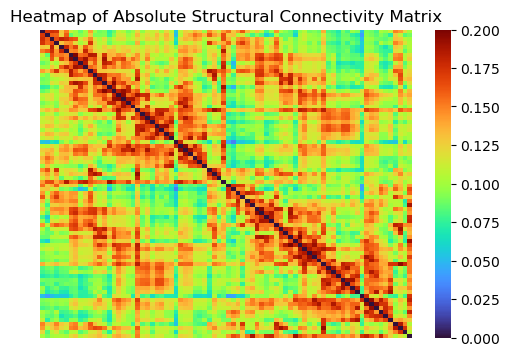

In [14]:
# Plotting the heatmap
plt.figure(figsize=(6, 4))  # Set the figure size for better visibility
sns.heatmap(C, cmap='turbo', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Absolute Structural Connectivity Matrix')
plt.show()

## Single frequency model

In [24]:
def single_freq_envelope_fc(beta):    
    G = 0.5
    num_steps = 32000  # total steps
    dt = 0.001  # time step
    a = 0.0  # intrinsic dynamics parameters for each neuron

    omega = 2 * np.pi * 12  # angular frequencies for each neuron
    x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)


    frequencies = [8, 12, 16]

    # Set up the plot grid
    num_frequencies = len(frequencies)
    cols = 3  # Define number of columns for subplots
    rows = num_frequencies // cols + (num_frequencies % cols > 0)  # Calculate required number of rows

    plt.figure(figsize=(cols * 5, rows * 4))  # Adjust the size as needed

    # Determine the global min and max correlation values for consistent colormap scaling
    min_corr = np.inf
    max_corr = -np.inf

    for f in frequencies:
        _, _, _, _, _, ultra_slow_x = signal_processing_on_hopf(x_values, C, dt, f, G)
        envelope_fc = compute_envelope_fc(ultra_slow_x)
        min_corr = min(min_corr, envelope_fc.min())
        max_corr = max(max_corr, envelope_fc.max())

    # Plot each Envelope FC matrix as a heatmap
    for i, f in enumerate(frequencies):
        _, _, _, _, _, ultra_slow_x = signal_processing_on_hopf(x_values, C, dt, f, G)
        envelope_fc = compute_envelope_fc(ultra_slow_x)

        # Plotting the Envelope FC matrix as a heatmap
        plt.subplot(rows, cols, i + 1)
        sns.heatmap(envelope_fc, cmap='turbo', square=True, cbar_kws={'label': 'Pearson Correlation'}, vmin=min_corr, vmax=max_corr)
        plt.title(f'Envelope FC Matrix - {f} Hz')
        plt.xlabel('Brain Regions')
        plt.ylabel('Brain Regions')

    plt.tight_layout()
    plt.show()

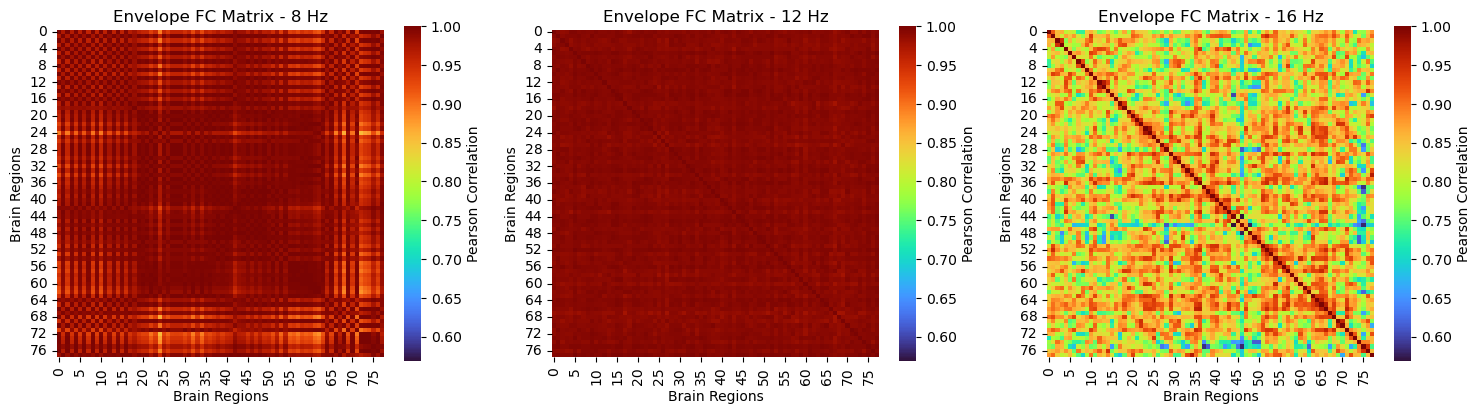

In [25]:
single_freq_envelope_fc(0.5)

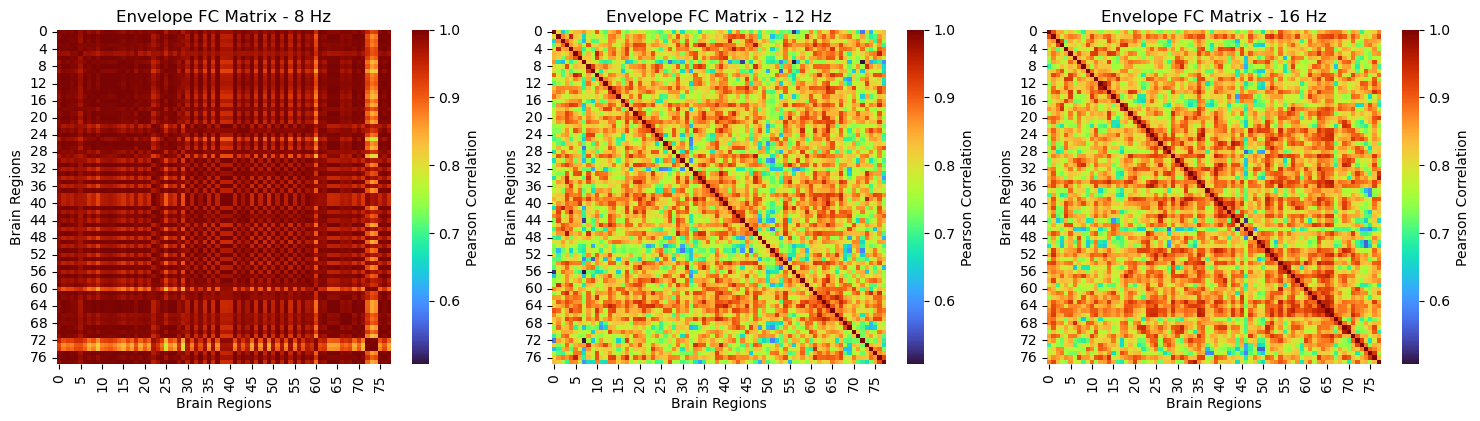

In [26]:
single_freq_envelope_fc(3)